In [2]:
%config IPCompleter.greedy=True

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
from sklearn import svm

In [3]:
data1 = scipy.io.loadmat('ex6data1.mat')

In [4]:
X = data1['X']; y = data1['y']
print(X[0])
print(y[0])

print(X.shape, y.shape)
print(X[:,0].reshape(len(X),1)[y==0])

[1.9643 4.5957]
[1]
(51, 2) (51, 1)
[1.5841  2.0103  1.9527  2.2753  2.3099  2.8283  3.0473  2.4827  2.5057
 1.8721  2.0103  1.2269  1.8951  1.561   1.5495  1.6878  1.4919  0.962
 1.1693  0.8122  0.9735  1.25    1.3191  2.2292  2.4482  2.7938  2.091
 2.5403  0.9044  0.76615]


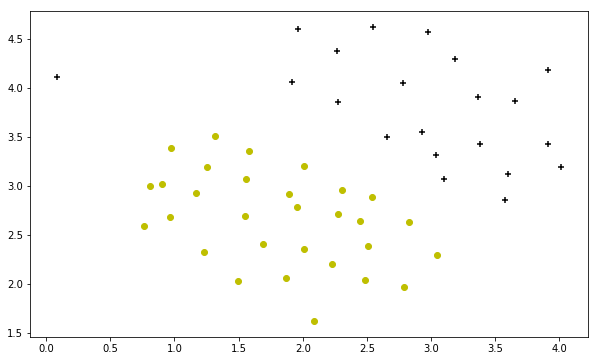

In [5]:
def plotData(X, y):
    plt.figure(figsize=(10,6))
    
    plt.scatter(X[:,0].reshape(len(X),1)[y==0],
                X[:,1].reshape(len(X),1)[y==0],
                marker = 'o', color='y' )
    plt.scatter(X[:,0].reshape(len(X),1)[y==1],
                X[:,1].reshape(len(X),1)[y==1], 
                marker='+', color='k')
    plt.show()

plotData(X, y)

In [6]:
def visualizeBoundary(X, y, model):
    """plots a non-linear decision boundary learned by the
    SVM and overlays the data on it"""

# Plot the training data on top of the boundary
    plt.figure()
    
    plt.scatter(X[:,0].reshape(len(X),1)[y==0],
                X[:,1].reshape(len(X),1)[y==0],
                marker = 'o', color='y' )
    plt.scatter(X[:,0].reshape(len(X),1)[y==1],
                X[:,1].reshape(len(X),1)[y==1], 
                marker='+', color='k')
    
    # Make classification predictions over a grid of values
    x1plot = np.linspace(min(X[:,0]), max(X[:,0]), X.shape[0]).T
    x2plot = np.linspace(min(X[:,1]), max(X[:,1]), X.shape[0]).T
    X1, X2 = np.meshgrid(x1plot, x2plot)
    print(X1.shape, X2.shape)
    vals = np.zeros(X1.shape)

    for i in range(X1.shape[1]):
        this_X = np.column_stack((X1[:, i], X2[:, i]))
        vals[:, i] = model.predict(this_X)
    print(vals.shape)
    # Plot the SVM boundary
    #contour(X1, X2, vals, [0 0], 'Color', 'b')
    plt.contour(X1, X2, vals, levels=[0.0, 0.0])

score 0.9803921568627451
(51, 51) (51, 51)
(51, 51)


/Users/sujeongkim/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


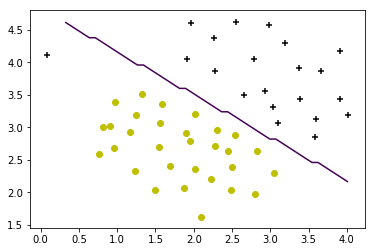

In [7]:
linear_svm = svm.SVC(C=1, kernel='linear')
linear_model = linear_svm.fit(X, y.flatten())
print("score", linear_model.score(X, y))
visualizeBoundary(X, y, linear_model)

score 1.0
(51, 51) (51, 51)
(51, 51)


/Users/sujeongkim/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


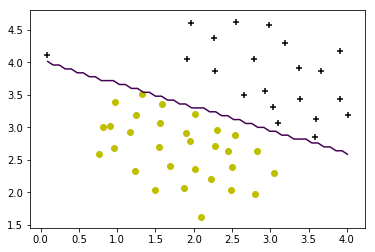

In [8]:
linear_svm = svm.SVC(C=100, kernel='linear')
linear_model = linear_svm.fit(X, y.flatten())
print("score", linear_model.score(X, y))
visualizeBoundary(X, y, linear_model)

In [9]:
linear_model.get_params()

{'C': 100,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### =============== Part 3: Implementing Gaussian Kernel ===============
##### You will now implement the Gaussian kernel to use
#####  with the SVM. You should complete the code in gaussianKernel.m

In [10]:
data2 = scipy.io.loadmat("ex6data2.mat")
print(data2.keys())
X = data2['X']; y = data2['y']
print('X:', X.shape, 'y:', y.shape)

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])
X: (863, 2) y: (863, 1)


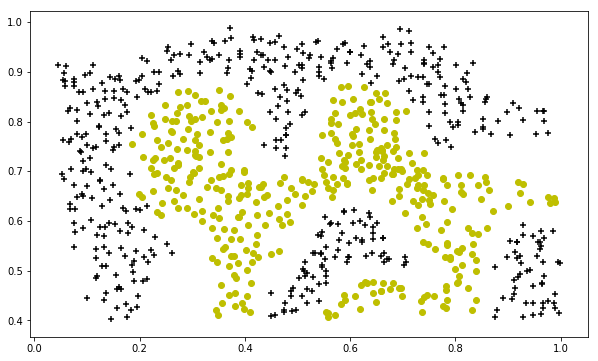

In [11]:
plotData(X,y)

In [15]:
def contourEx(X, y, model):
    x0_range = np.linspace(np.min(X[:,0]), np.max(X[:,0]), X.shape[0])
    #print("X0", np.min(X[:,0]), np.max(X[:,0]), 100)
    x1_range = np.linspace(np.min(X[:,1]), np.max(X[:,1]), X.shape[0])
    #print("X1", np.min(X[:,1]), np.max(X[:,1]), 100)
    
    x0, x1 = np.meshgrid(x0_range, x1_range)
    z = np.zeros(x0.shape)
    
    for i in range(x0.shape[1]):
        data = np.column_stack((x0[:,i], x1[:,i]))
        result = model.predict(data)
        z[:,i] = result
        
    plt.figure(figsize=(10,6))
     
    plt.scatter(X[:,0].reshape(len(X),1)[y==0],
                X[:,1].reshape(len(X),1)[y==0],
                marker = 'o', color='y', label='positive' )
    plt.scatter(X[:,0].reshape(len(X),1)[y==1],
                X[:,1].reshape(len(X),1)[y==1], 
                marker='+', color='k', label='negative')
    
    plt.contour(x0_range, x1_range, z, 0, label='decision boundary')
    
    plt.legend()
    plt.show()
    
    #for i in range(len(x0_range)):
    #    for j in range(len(x1_range)):
    #        data = np.array([x0_range[i], x1_range[j]]).reshape(1,2)
    #        z[i][j] = model.predict(data)
    

In [16]:
def gaussian(x_i, x_j, sigma):
    return np.exp( -np.sum(pow(x_i - x_j,2)) / (2*sigma*sigma))
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2
gaussian(x1, x2, sigma)

0.32465246735834974

score 0.9895712630359212


/Users/sujeongkim/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/sujeongkim/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


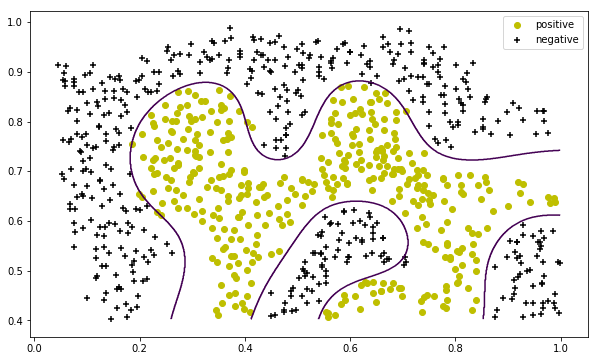

In [17]:
C = 1
sigma = 0.1
gamma = 1.0 / (2.0 * sigma ** 2)

gauss_svm = svm.SVC(C=1, kernel='rbf', gamma=gamma)
gauss_model = gauss_svm.fit(X, y.flatten())
print("score", gauss_model.score(X, y))
contourEx(X, y, gauss_model)

In [28]:
data3 = scipy.io.loadmat('ex6data3.mat')
print(data3.keys())

X = data3['X']; y = data3['y']; Xval = data3['Xval']; yval= data3['yval']

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])


In [45]:
C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma = C

best_score = 0.0
optimized = (0,0)
for c in C:
    for s in sigma:
        gamma = 1.0 / (2.0 * s ** 2)
        gauss_svm = svm.SVC(C=c, kernel='rbf', gamma=gamma)
        gauss_model = gauss_svm.fit(X, y.flatten())
        #print("C", c, "sigma", s, "score", gauss_model.score(X, y))
        score = gauss_model.score(Xval, yval)
        if score > best_score:
            best_score = score
            optimized = (c, s)
            
print("best_score:", best_score, "C:", optimized[0], "sigma:", optimized[1])

best_score: 0.965 C: 1 sigma: 0.1


0.9478672985781991


/Users/sujeongkim/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/Users/sujeongkim/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label'
  s)


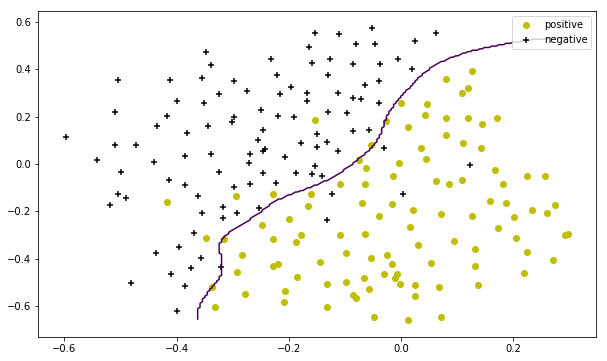

In [47]:
gamma = 1.0 / (2.0 * optimized[1] ** 2)
gauss_svm = svm.SVC(C=optimized[0], kernel='rbf', gamma=gamma)
optimized_model = gauss_svm.fit(X, y.flatten())
print(optimized_model.score(X,y))
contourEx(X, y, optimized_model)